<hr>
<center><b>EDUARDO MENDIETA<br>PRACTICA - MODELO DE REGRESION LINEAL</b></center>
<hr>
<p><b>Objetivo:</b> Detectar el deterioro cognitivo de las personas.<p>

<p>Es necesario comprender a qué se refiere el objetivo, consultando a profesionales expertos en el tema. Se debe adquirir conocimiento a través de estos expertos o mediante investigación. Esto es fundamental para identificar las variables dependientes e independientes.</p>

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel('BASE PARA ANALISIS-M2A.xlsx', sheet_name=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Columns: 345 entries, VERIFICACION to firma de consentimiento
dtypes: float64(266), int64(56), object(23)
memory usage: 202.3+ KB


In [3]:
# Convierte un número en el formato de columna estilo Excel (A, B, ..., Z, AA, AB, ...)
# para lograr estandarizar los nombre de las columnas y ubicarlos de manera eficiente en 
# el excel.
def num_to_excel_col(n):
    excel_col = ''
    while n > 0:
        n, remainder = divmod(n - 1, 26)
        excel_col = chr(65 + remainder) + excel_col
    return excel_col

In [4]:
# Estandarizamos los nombre de las columnas para que estos no sea muy largos.
dict_datos = {}

columnas_aux = df.columns.to_list()

df.columns = (df.columns.str.title().str.replace(r'[^a-zA-Z]', '', regex=True).str[:8])
df.columns = [f'{num_to_excel_col(i+1)}_{col}' for i, col in enumerate(df.columns)]

for i, col in enumerate(df.columns):
  dict_datos[col] = columnas_aux[i]

print(f'Diccionario:\n{list(dict_datos.items())[: 3]}\n\n')
print(f'Columnas:\n{df.columns[:3]}')

nombres_columnas = df.columns.to_list()

Diccionario:
[('A_Verifica', 'VERIFICACION'), ('B_Estado', 'ESTADO'), ('C_NombresY', '1.- Nombres y Apellidos del encuestado (Adulto mayor)')]


Columnas:
Index(['A_Verifica', 'B_Estado', 'C_NombresY'], dtype='object')


In [6]:
# Buscamos el nombre de la columna utilizando la letra correspondiente a la columna de Excel:
def buscar_columna(letra_celda):
    letra_celda = letra_celda.upper()
    for columna in nombres_columnas:
        if columna.startswith(letra_celda):
            return columna
    return None

In [5]:
def get_info_nulos():
    nulos = df.isnull().sum()
    return nulos[nulos > 0].sort_values(ascending=False)


get_info_nulos()

LE_            75
MF_Medicion    75
LG_Unnamed     75
K_Enfermed     71
L_Escribir     70
               ..
CF_ItemPost     1
CG_ItemPost     1
CH_ItemPost     1
CI_ItemPost     1
BM_ItemPreS     1
Length: 278, dtype: int64

In [ ]:
# Buscamos las columnas de interes en el Excel e identificamos su nombre de columna en el df:
colname_total_wais = buscar_columna('LM')
colname_edad = buscar_columna('E')
print(f'Columnas de interes: {colname_total_wais}, {colname_edad}')

Columnas de interes: LM_TotalWai, E_Edad


In [9]:
df = df.dropna(subset=[colname_total_wais])

<hr><p><b>VISUALIZACIÓN DE VARIABLES:</b><p>

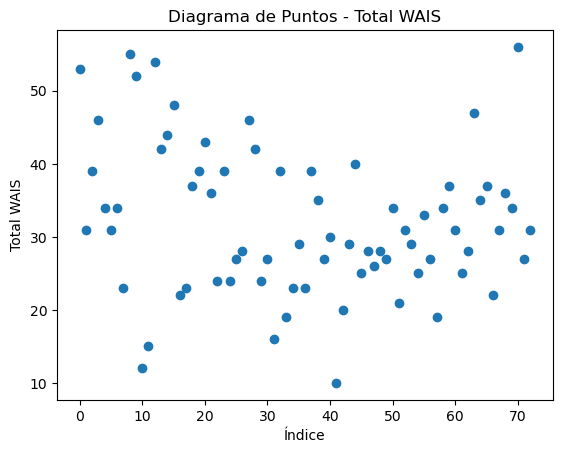

In [ ]:
# Gráfico de dispersión Total WAIS:
plt.scatter(range(len(df)), df[colname_total_wais])
plt.title('Diagrama de Puntos - Total WAIS')
plt.xlabel('Índice')
plt.ylabel('Total WAIS')
plt.show()

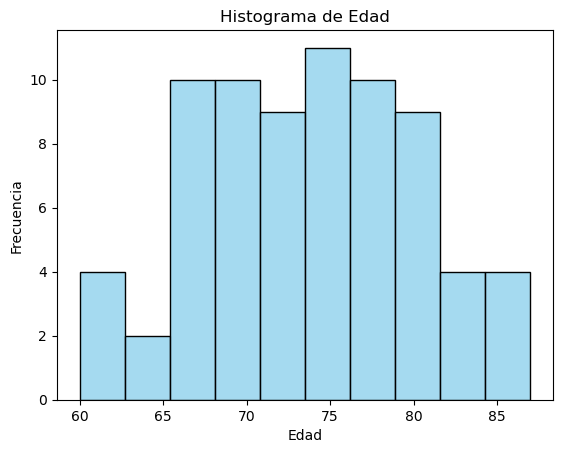

In [21]:
# Histograma de Edad:
sns.histplot(df[colname_edad], bins=10, kde=False, color='skyblue')

plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

<hr><p><b>MODELAR:</b><p>
<br><p>Columnas de interes para el estudio: Total WAIS, EDAD.<p>

In [12]:
x = df[[colname_total_wais]]
y = df[[colname_edad]]

In [ ]:
# Escalamiento de caracteristicas:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)

In [14]:
# Entrenamiento con modelo de Regresión Lineal:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [15]:
# Predicción:
y_pred = modelo.predict(x_test)

In [ ]:
# Evaluación del modelo:
mse_lineal = mean_squared_error(y_test, y_pred)
r2_lineal = r2_score(y_test, y_pred)
print(f'Regresión Lineal - MSE: {mse_lineal}, R2: {r2_lineal}')

Regresión Lineal - MSE: 66.74061748525577, R2: -0.06320015110326715
